# <b>Capstone Project 

### <b>Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, plot_precision_recall_curve, plot_confusion_matrix

### <b> Importing Dataset

In [2]:
data = pd.read_csv('C:\GitHub\ML_DS_projects\Incomplete Projects\CapStone Project\Dataset\customer_churn.csv')

### <b> Data Preprocessing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
categoriacal_cols = []
for cols in data.columns:
    if(data[cols].dtype == 'object'):
        categoriacal_cols.append(cols)
print(categoriacal_cols)
print(len(categoriacal_cols))

['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
18


Text(0.5, 1.02, 'Count of the TARGET variable per category')

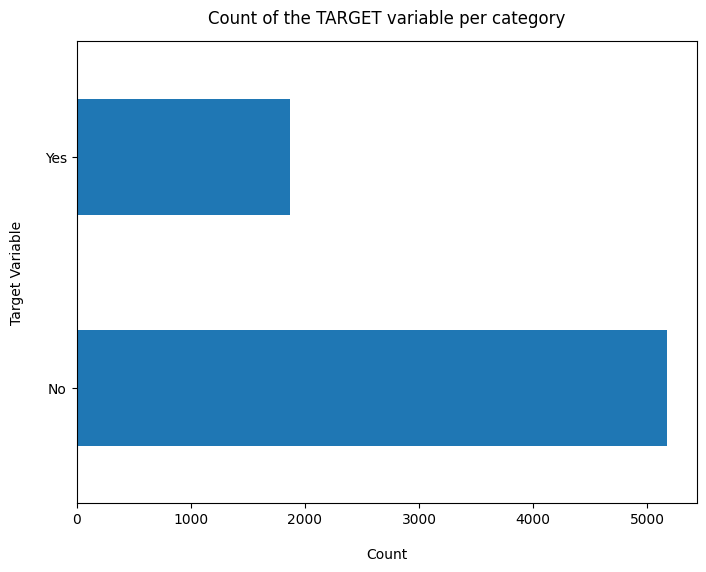

In [11]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=15)
plt.ylabel("Target Variable", labelpad=15)
plt.title("Count of the TARGET variable per category", y = 1.02)

In [12]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
print("Persentage of Data churners: \n")
data['Churn'].value_counts()/len(data['Churn'])*100

Persentage of Data churners: 



No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

<ul>
<li> Data is hightly imbalancesd, ratio = 1869/5174
<li> So we analyze the data with the other features while taking the target values separately to get some insights.
<li> Oversampling gets best results in most of the cases.
</ul>

In [14]:
#Imbalance Ratio: 
1869/5174

0.36122922303826827

missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<b> Missing Data 

Data Cleaning 

In [15]:
telco_data = data.copy()

In [16]:

telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#Get the maximum tenure data
print(data['tenure'].max())

72


In [18]:
#Group the tenure in bins of 12 moonths
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right= False, labels=labels)

In [19]:
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [20]:
telco_data.loc[telco_data['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [21]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

In [22]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### <b>Remove columns not required for processing

In [23]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# <b>EDA :


<b>Univariate Analysis

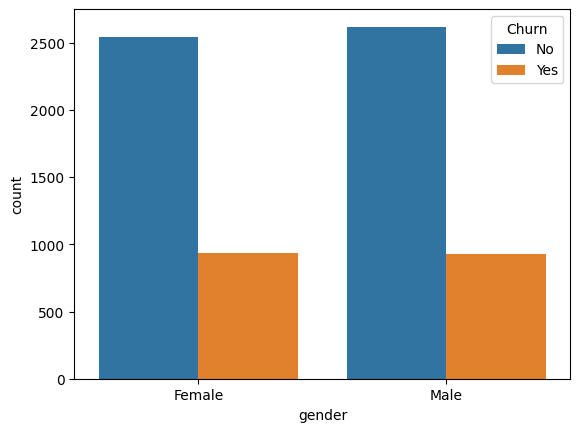

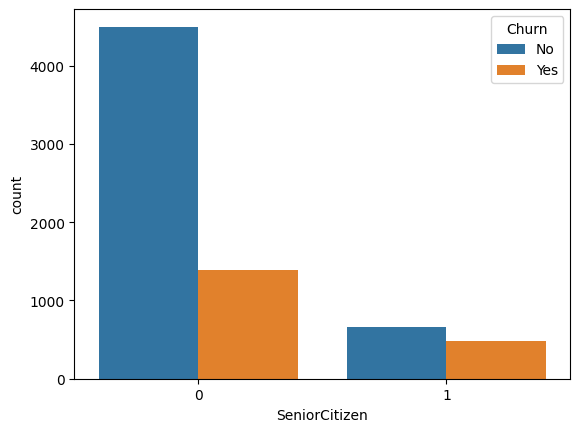

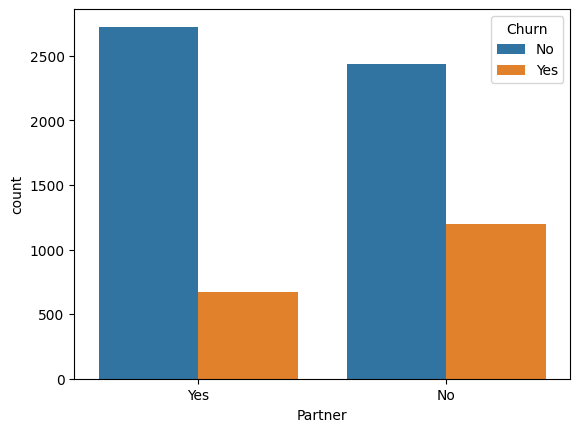

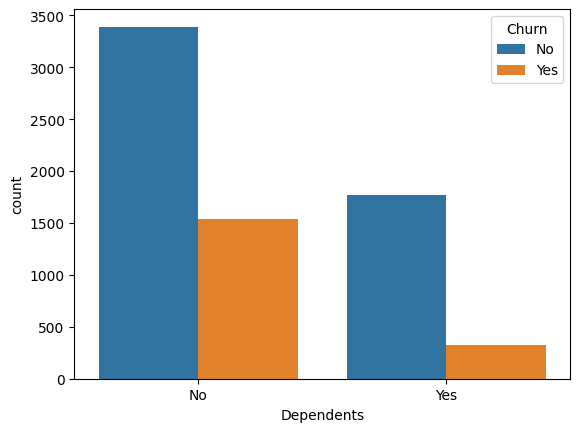

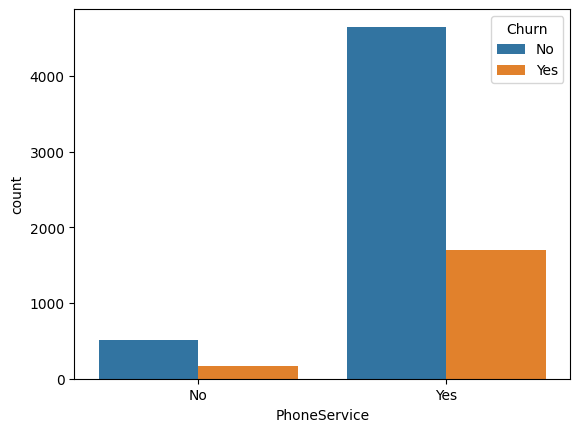

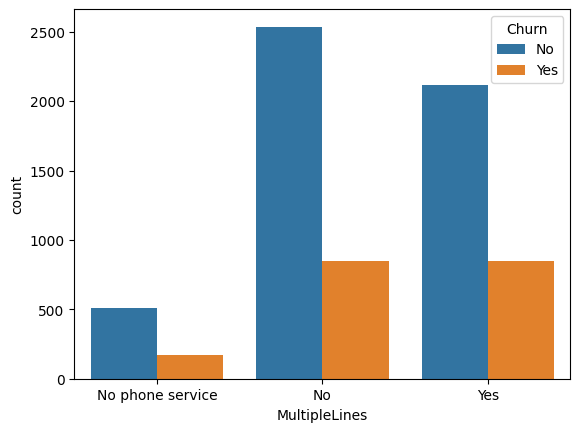

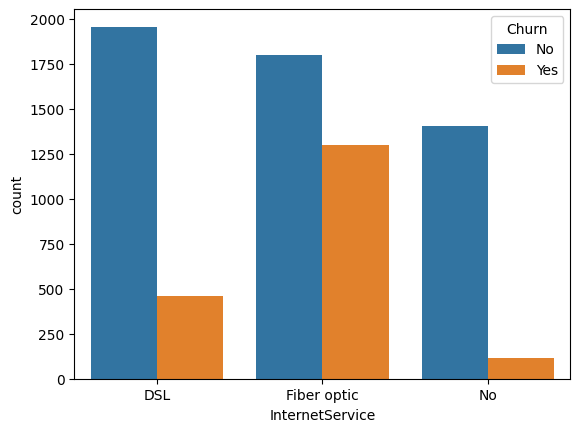

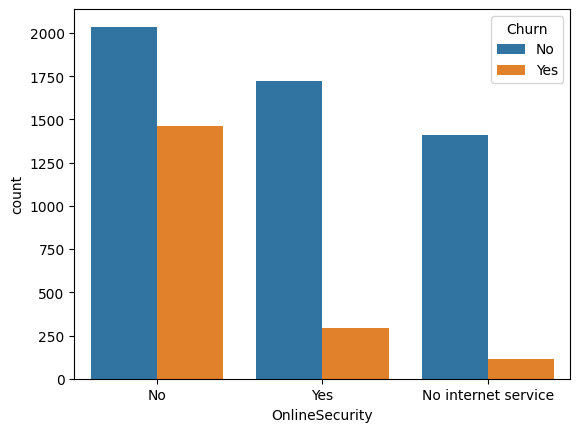

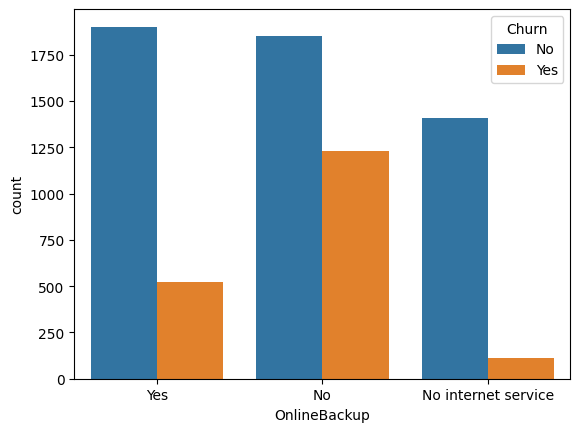

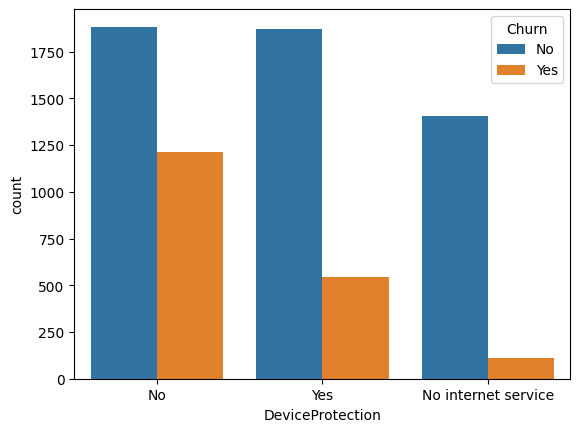

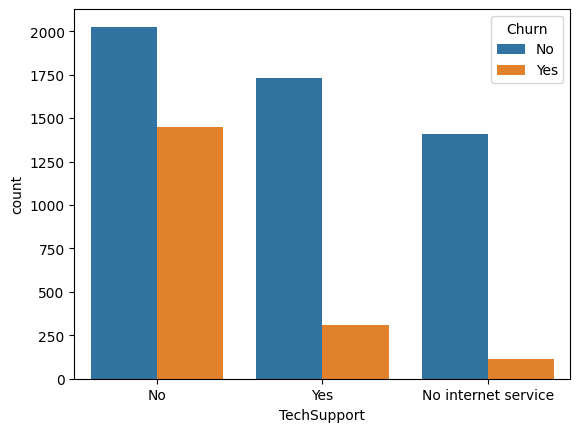

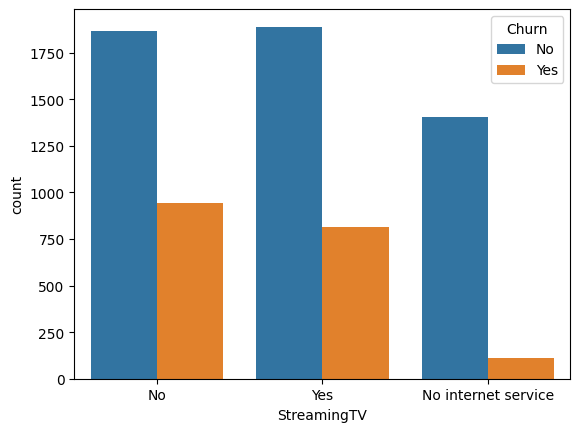

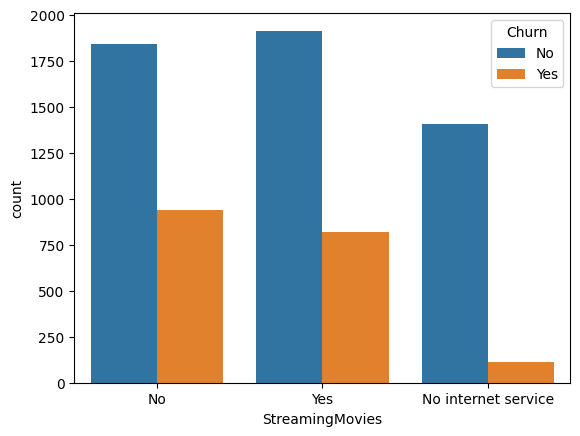

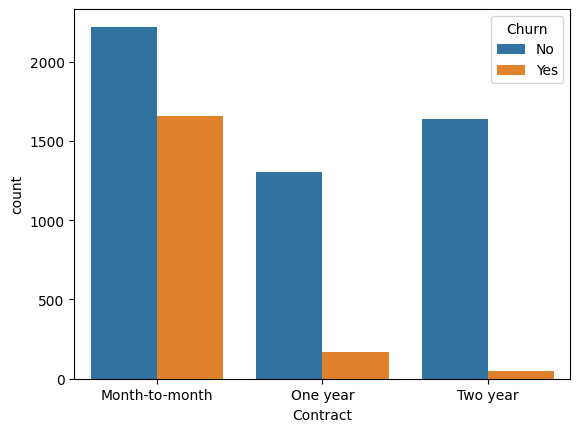

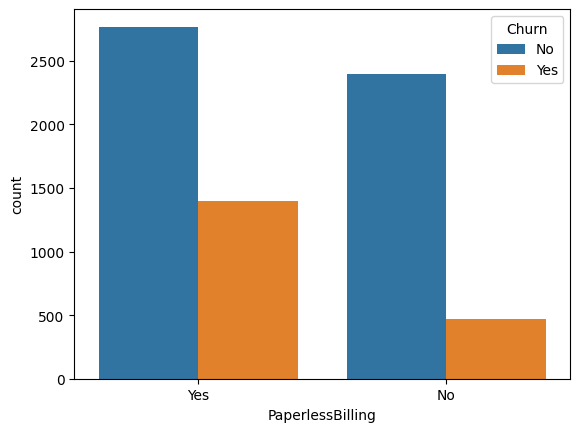

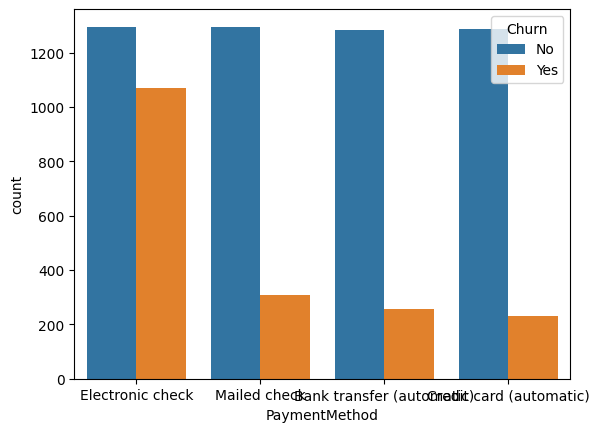

In [24]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

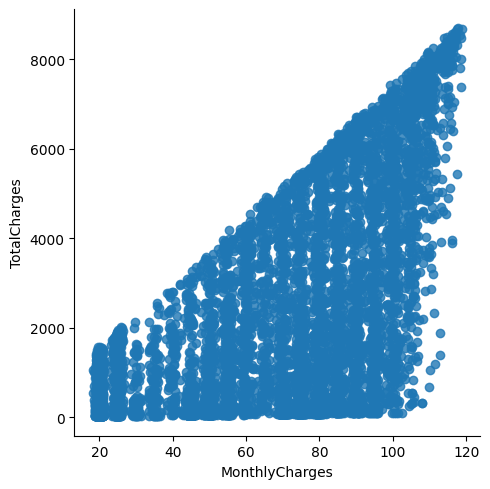

In [25]:
# Relationship between Monthly Charges and Total Charges
sns.lmplot(data=telco_data, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [26]:
telco_data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [27]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


Text(0.5, 1.0, 'Monthly charges by churn')

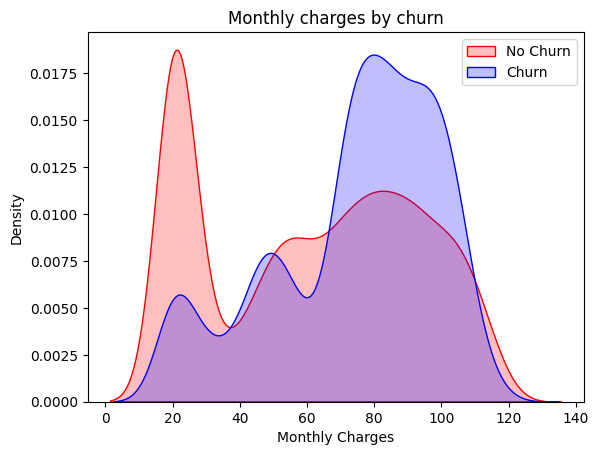

In [28]:
# Churn by Monthly Charges and Total Charges

Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[telco_data_dummies['Churn_Yes'] == 0], color="Red", fill=True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[telco_data_dummies['Churn_Yes'] == 1], ax=Mth, color="Blue", fill=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

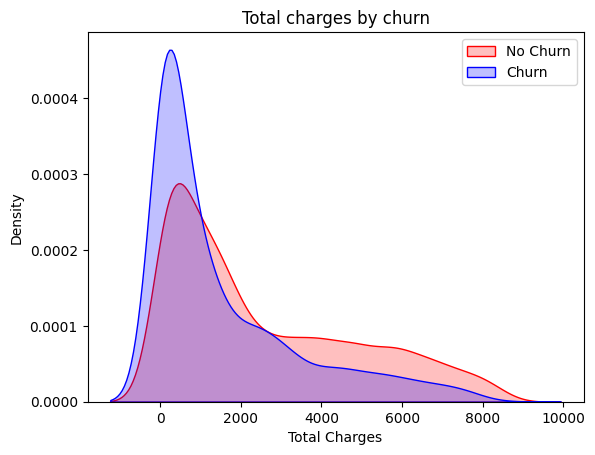

In [29]:
# Churn is high when Monthly Charges ar high

Tot = sns.kdeplot(telco_data_dummies.TotalCharges[telco_data_dummies['Churn_Yes'] == 0], color="Red", fill=True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[telco_data_dummies['Churn_Yes'] == 1], ax=Tot, color="Blue", fill=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Build a corelation of all predictors with 'Churn' **

<AxesSubplot:>

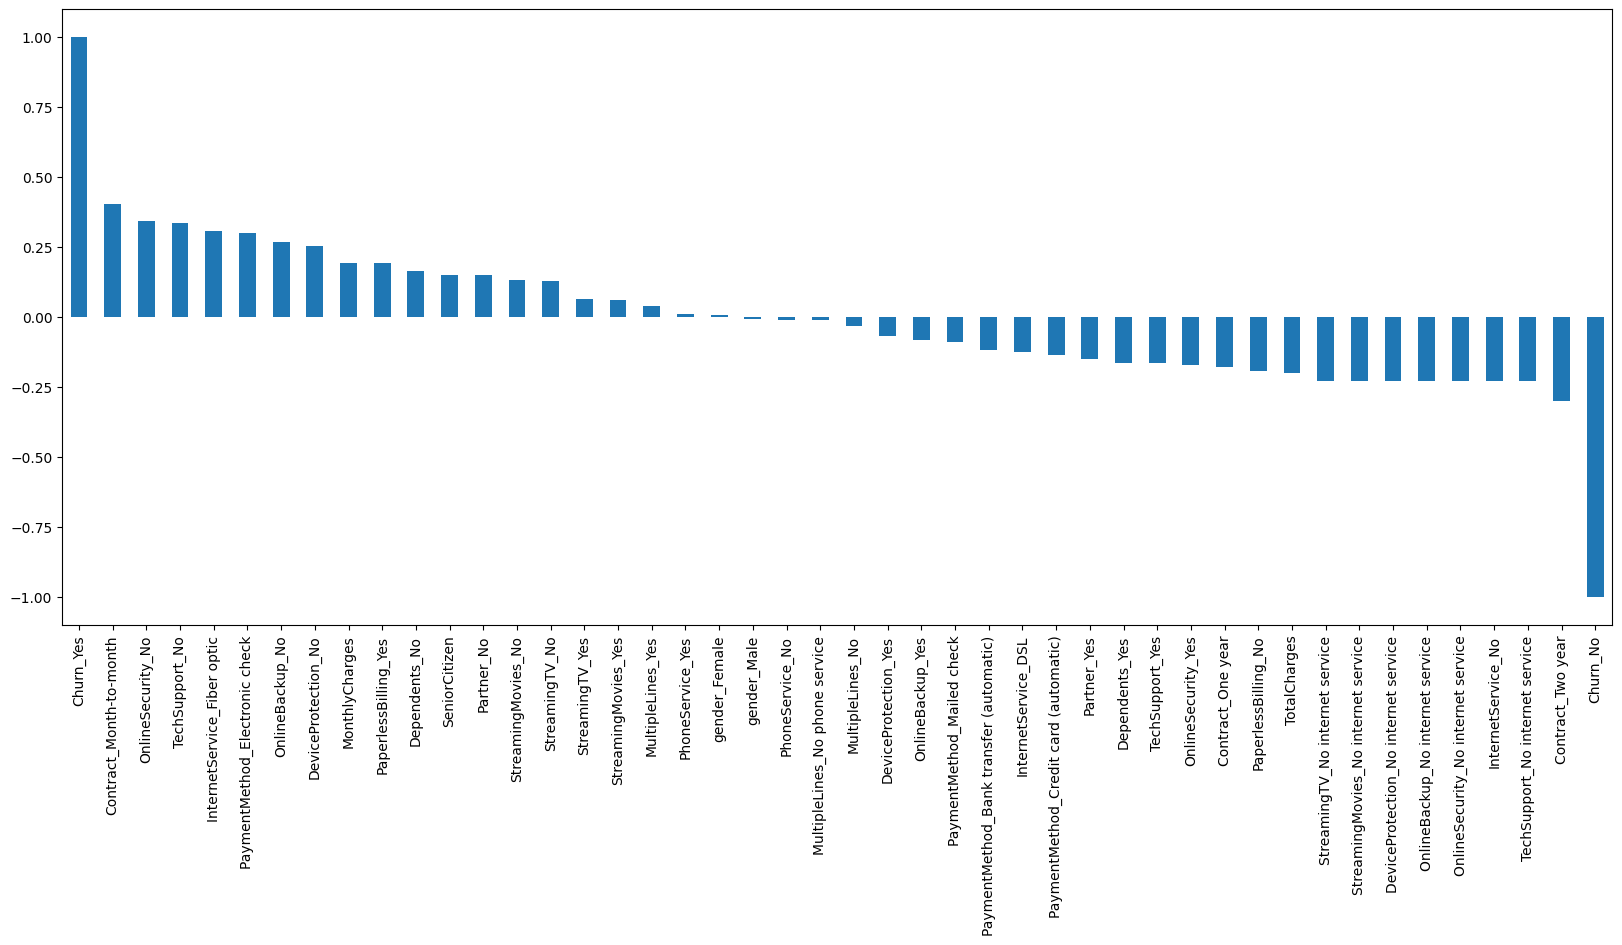

In [30]:

plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn_Yes'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

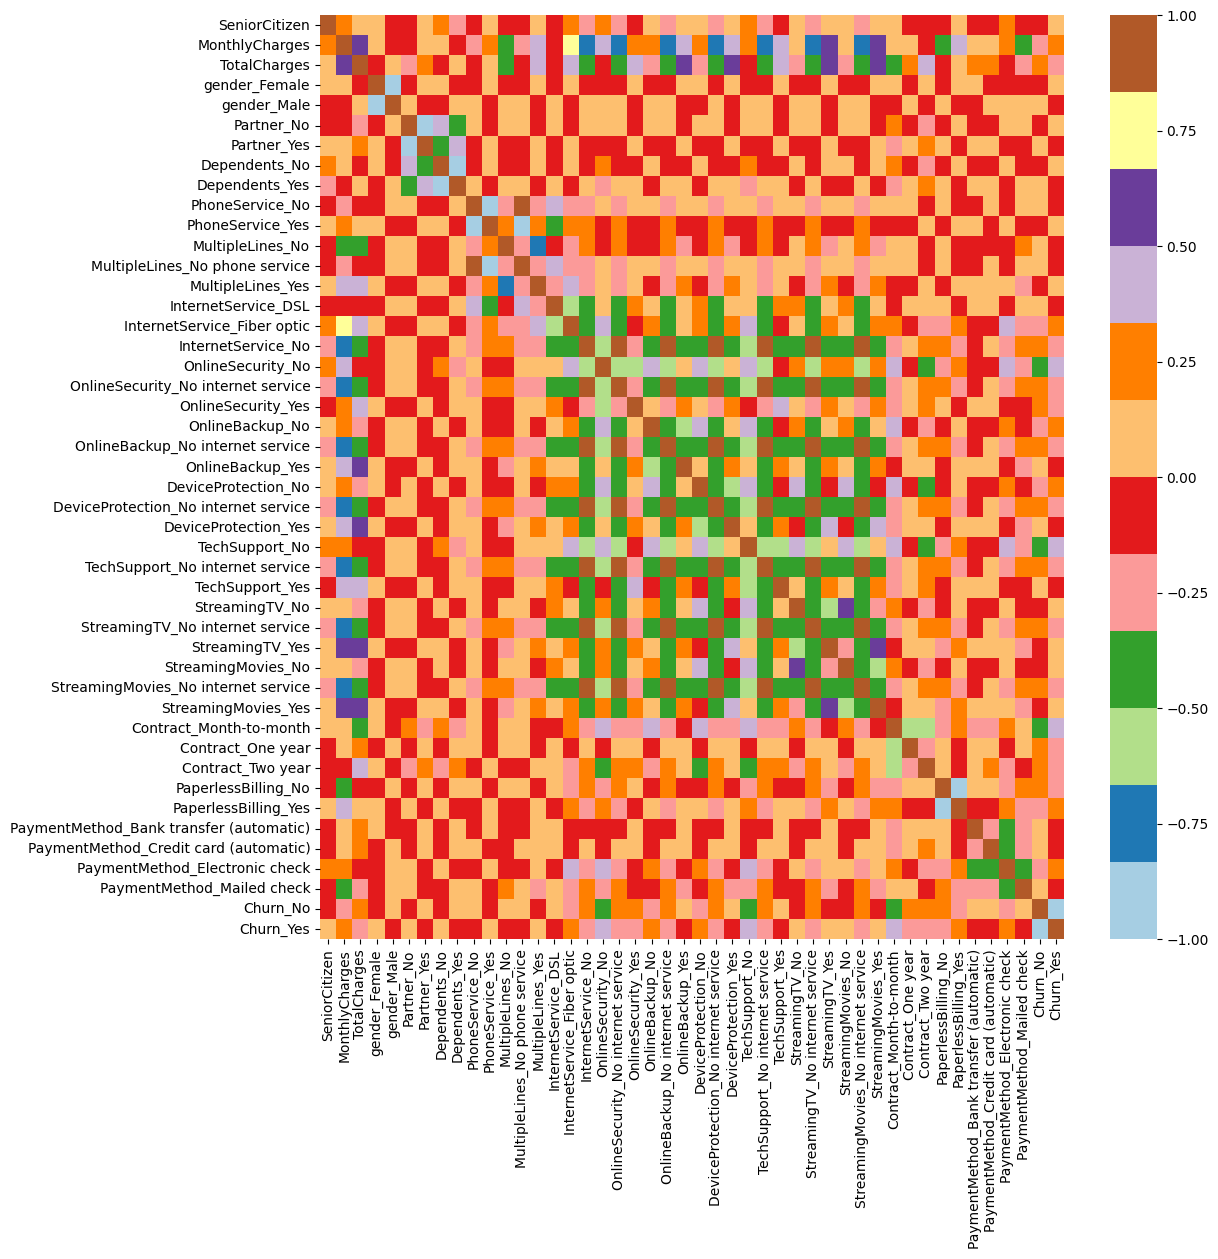

In [31]:

plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [32]:

new_df1_target0=telco_data.loc[telco_data["Churn"]=='No']
new_df1_target1=telco_data.loc[telco_data["Churn"]=='Yes']

In [33]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

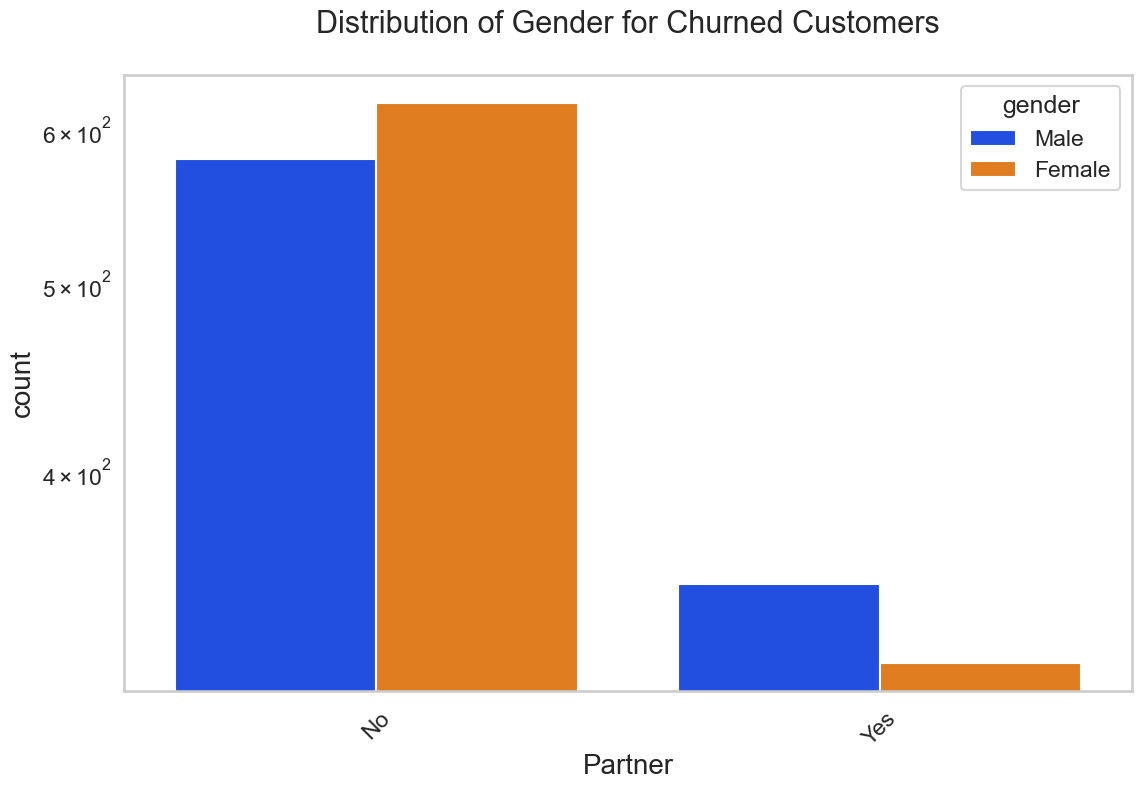

In [34]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')


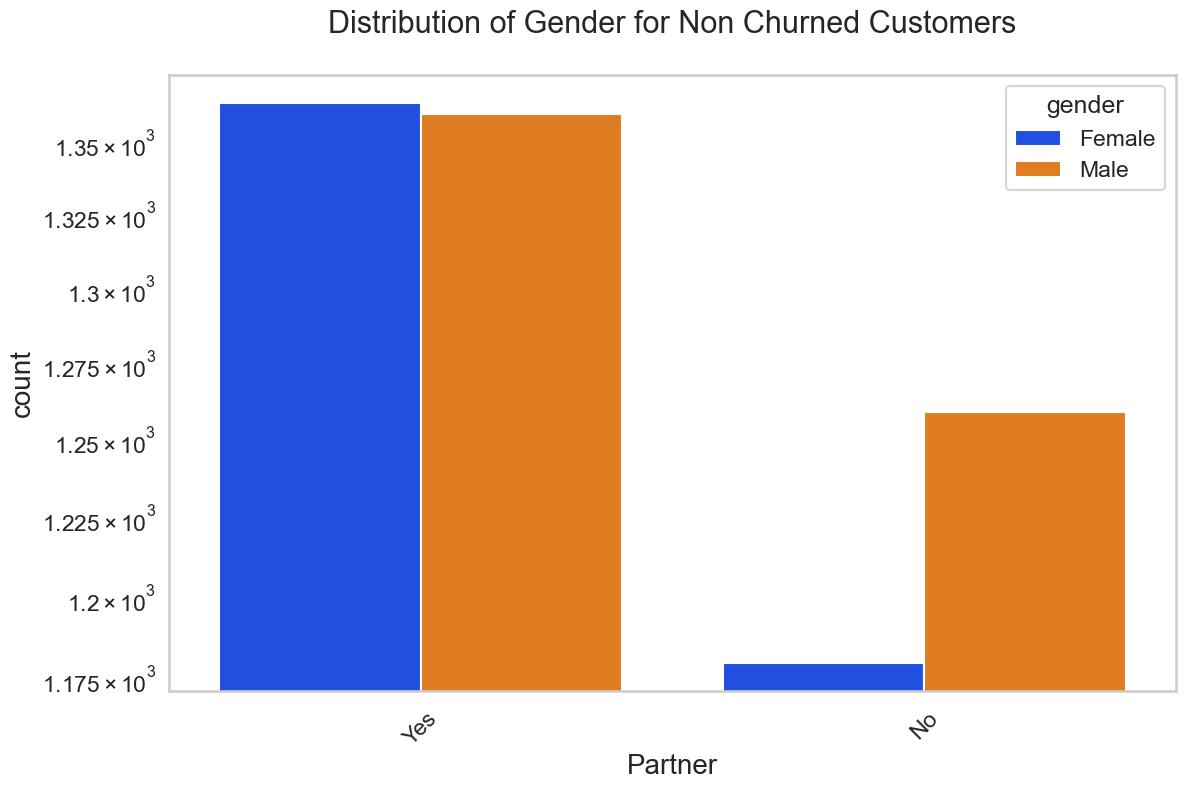

In [35]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

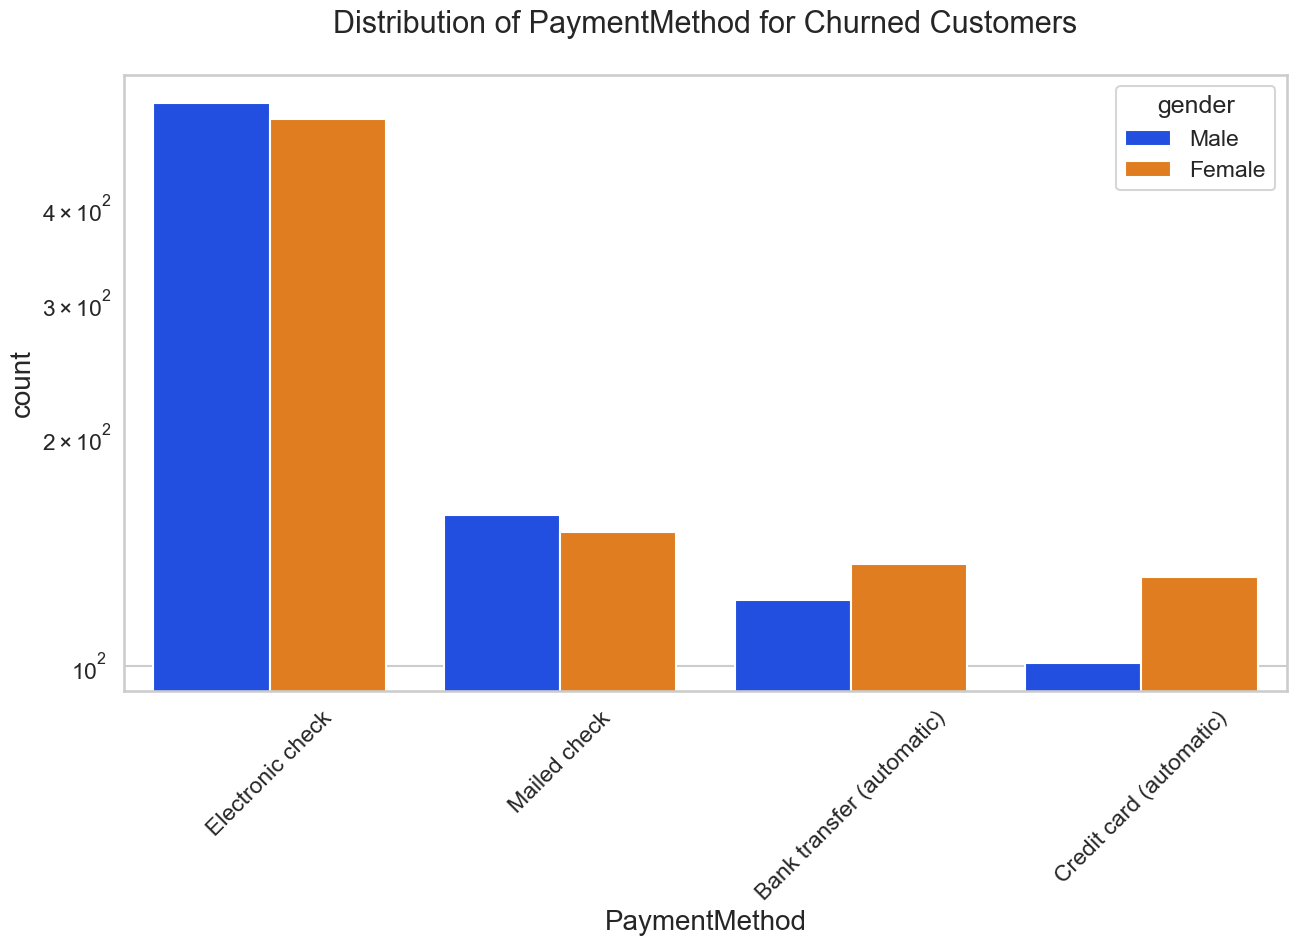

In [36]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


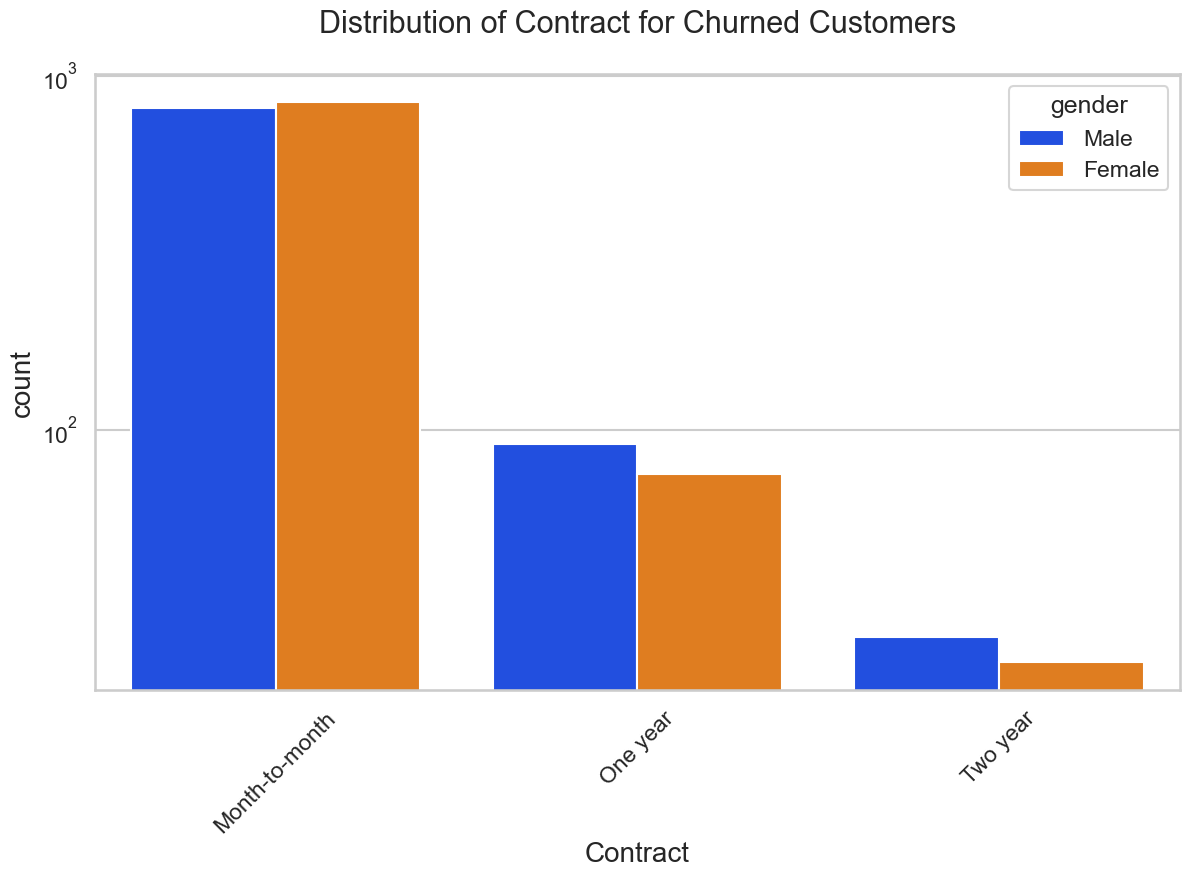

In [37]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')


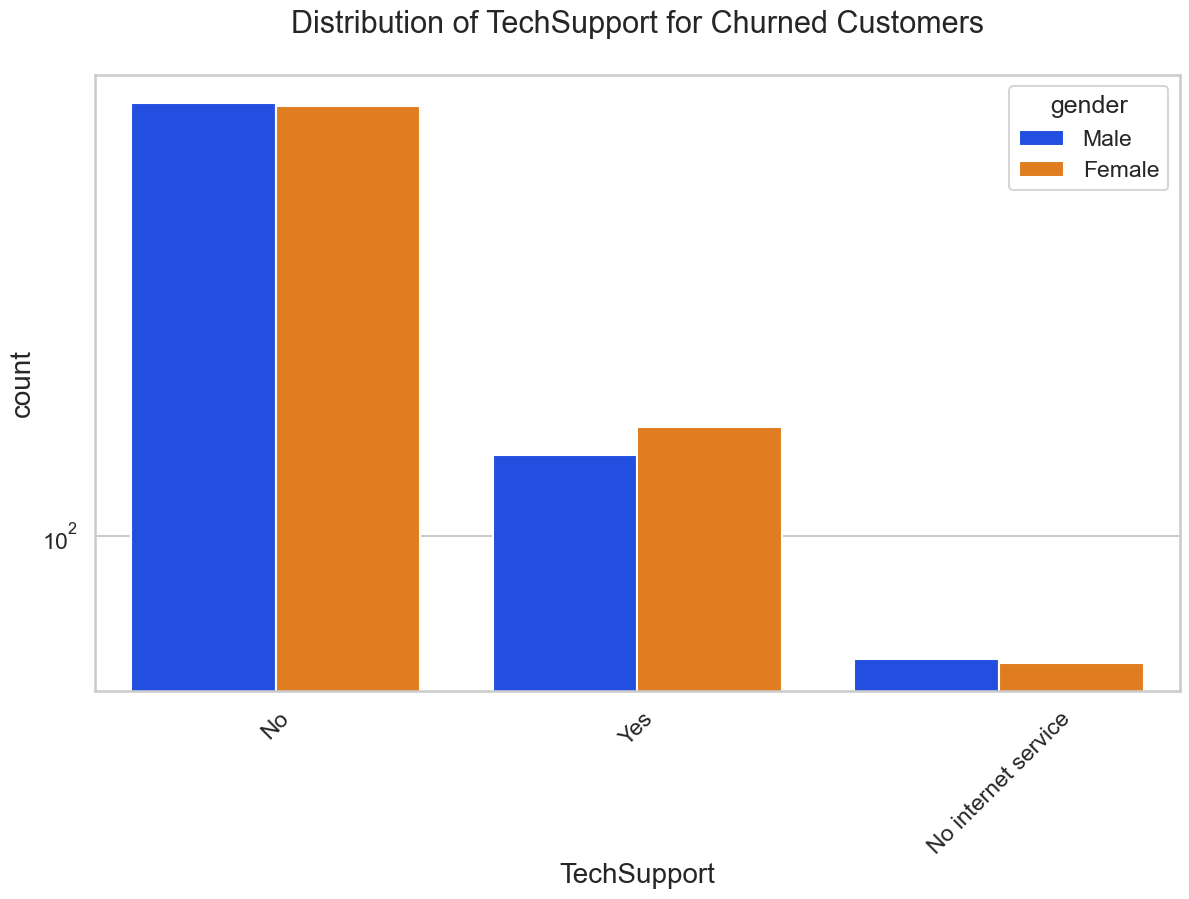

In [38]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


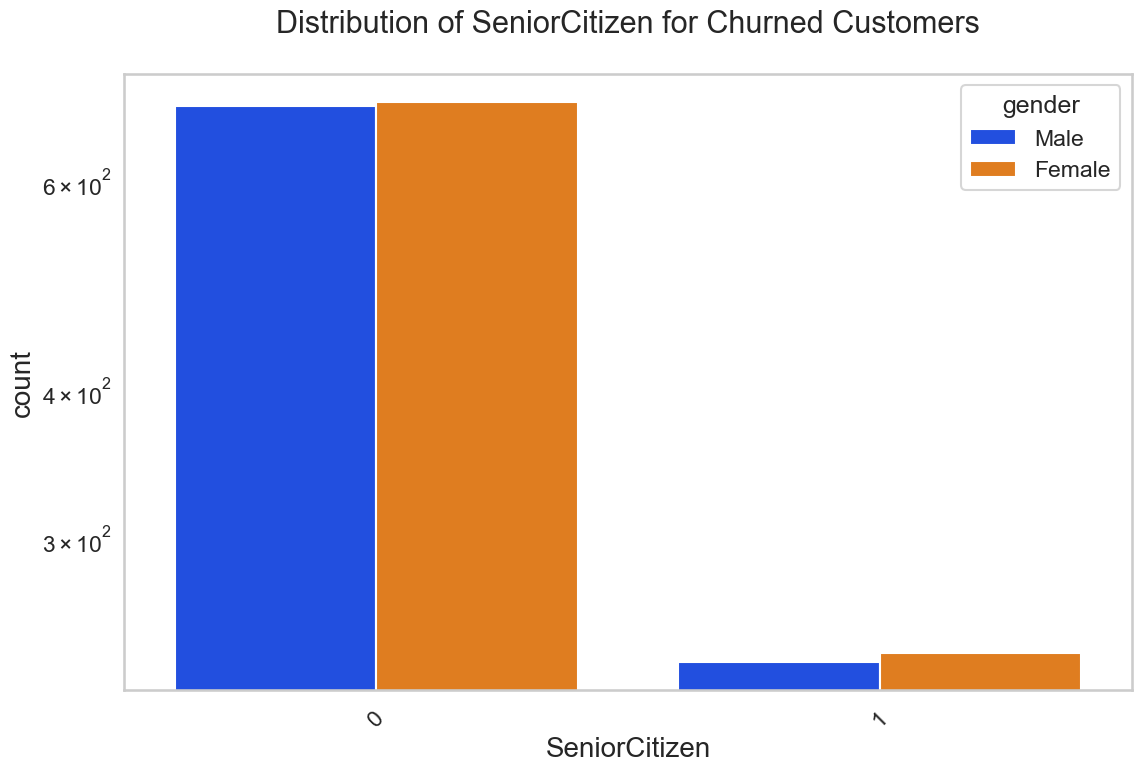

In [39]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')


## <b> Data Labeling 

In [40]:
#Droping this as it does not affect results 
data = data.drop(columns=['customerID'])

In [41]:
#Categorical columns 
categoriacal_cols = []
for cols in data.columns:
    if(data[cols].dtype == 'object'):
        categoriacal_cols.append(cols)
print(categoriacal_cols)
print(len(categoriacal_cols))

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
17


In [42]:
# Create a label encoder object
le = LabelEncoder()

# Perform label encoding on categorical columns
for col in categoriacal_cols:
    data[col] = le.fit_transform(data[col])

In [43]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,2505,0,1 - 12
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1466,0,25 - 36
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,157,1,1 - 12
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1400,0,37 - 48
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,925,1,1 - 12


In [44]:
# Assuming your DataFrame is named 'data'
data['tenure_group_encoded'] = data['tenure_group'].astype('category').cat.codes

# Let's check the encoded values
print(data[['tenure_group', 'tenure_group_encoded']])


     tenure_group  tenure_group_encoded
0          1 - 12                     0
1         25 - 36                     2
2          1 - 12                     0
3         37 - 48                     3
4          1 - 12                     0
...           ...                   ...
7038      13 - 24                     1
7039      61 - 72                     5
7040       1 - 12                     0
7041       1 - 12                     0
7042      61 - 72                     5

[7043 rows x 2 columns]


In [45]:
data = data.drop(columns=['tenure_group'])

In [46]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group_encoded
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,2505,0,0
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1466,0,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,157,1,0
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1400,0,3
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,925,1,0


### <b> Spliting data and applying oversampling 

In [47]:
# Applying oversampling on the dataset

# Splitting data into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Applying oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [48]:
# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [49]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [50]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [51]:

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)


In [52]:
# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)


In [53]:
# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

In [54]:
# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [55]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)


In [56]:
# Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

In [57]:
# Artificial Neural Network
ann_classifier = MLPClassifier()
ann_classifier.fit(X_train, y_train)
y_pred_ann = ann_classifier.predict(X_test)


c:\ProgramData\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [58]:
# Evaluating each model
models = {
    "Logistic Regression": y_pred_log_reg,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "Support Vector Machine": y_pred_svm,
    "K-Nearest Neighbors": y_pred_knn,
    "Naive Bayes": y_pred_nb,
    "Artificial Neural Network": y_pred_ann
}


In [59]:
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}
for name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-score"].append(f1)

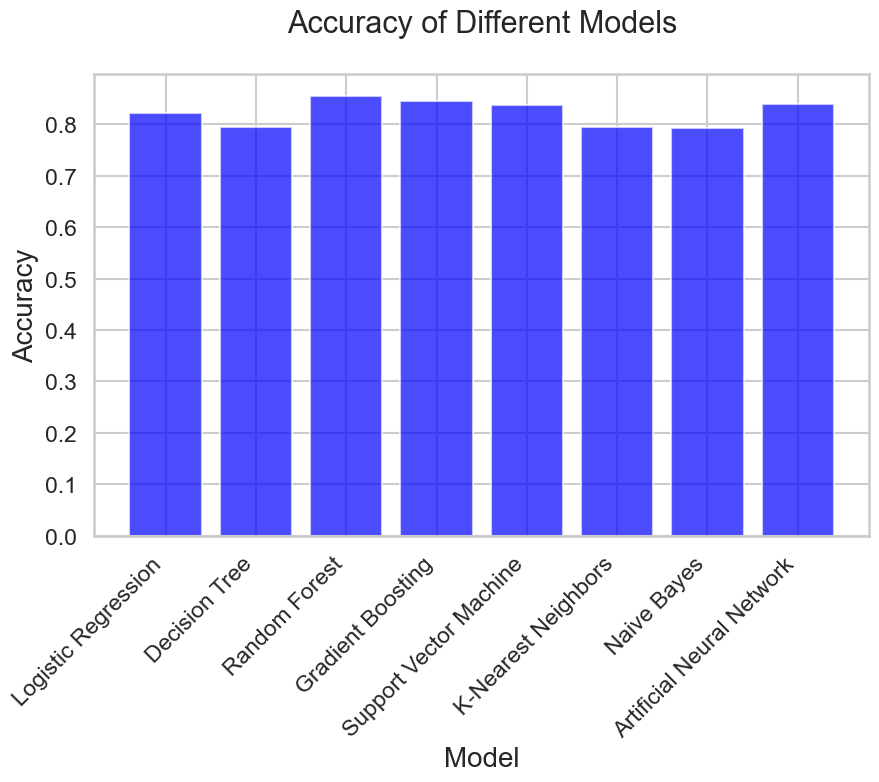

In [60]:
# Plotting results
plt.figure(figsize=(10, 6))
plt.bar(results["Model"], results["Accuracy"], color='b', alpha=0.7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
# Displaying results
print("Model\t\tAccuracy\tPrecision\tRecall\t\tF1-score")
for i in range(len(results["Model"])):
    print(f"{results['Model'][i]:<25}{results['Accuracy'][i]:.4f}\t\t{results['Precision'][i]:.4f}\t\t{results['Recall'][i]:.4f}\t\t{results['F1-score'][i]:.4f}")

Model		Accuracy	Precision	Recall		F1-score
Logistic Regression      0.8222		0.8032		0.8599		0.8306
Decision Tree            0.7952		0.8037		0.7884		0.7960
Random Forest            0.8556		0.8627		0.8503		0.8565
Gradient Boosting        0.8459		0.8276		0.8789		0.8525
Support Vector Machine   0.8367		0.8313		0.8503		0.8407
K-Nearest Neighbors      0.7957		0.7694		0.8522		0.8087
Naive Bayes              0.7937		0.7743		0.8370		0.8044
Artificial Neural Network0.8401		0.8419		0.8427		0.8423


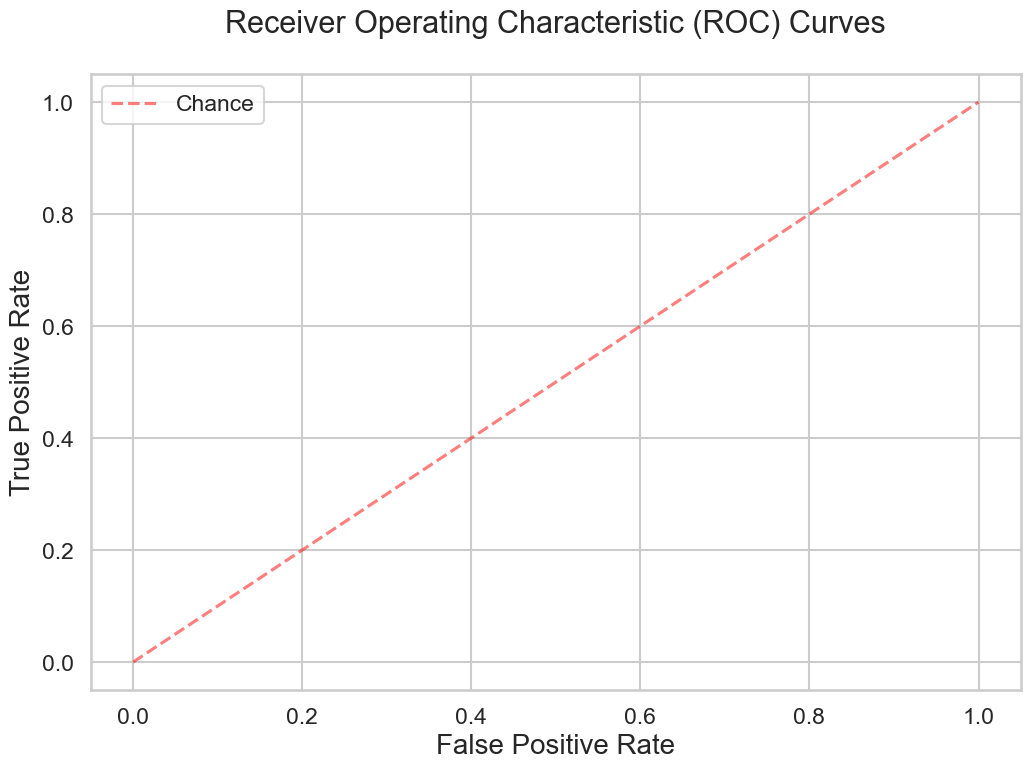

In [62]:
from sklearn.metrics import plot_roc_curve, confusion_matrix

# ROC Curves
plt.figure(figsize=(12, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        plot_roc_curve(model, X_test, y_test, ax=plt.gca(), name=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend()
plt.show()


<b>Performing PCA

In [65]:
from sklearn import metrics
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(X_train)
xr_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [66]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [67]:
model.fit(xr_train_pca,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [68]:
yr_predict_pca = model.predict(xr_test_pca)

In [69]:
model_score_r_pca = model.score(xr_test_pca, y_test)

In [70]:
print(model_score_r_pca)
print(metrics.classification_report(y_test, yr_predict_pca))

0.8072463768115942
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1021
           1       0.79      0.84      0.81      1049

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070

